In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'C://Users//jkim436//Downloads//compressed_images'
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    base_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', subset='training', shuffle=True)

validation_generator = datagen.flow_from_directory(
    base_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', subset='validation', shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_generator = test_datagen.flow_from_directory(
    base_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', subset='validation', shuffle=False)

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(199, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Found 49329 images belonging to 199 classes.
Found 21011 images belonging to 199 classes.
Found 6935 images belonging to 199 classes.
Epoch 1/30


C:\Users\jkim436\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 661s 406ms/step - accuracy: 0.0079 - loss: 5.3219 - val_accuracy: 0.0143 - val_loss: 5.1953
Epoch 2/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 703s 455ms/step - accuracy: 0.0181 - loss: 5.1739 - val_accuracy: 0.0201 - val_loss: 5.1298
Epoch 3/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 706s 456ms/step - accuracy: 0.0246 - loss: 5.0936 - val_accuracy: 0.0266 - val_loss: 5.0823
Epoch 4/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 739s 478ms/step - accuracy: 0.0293 - loss: 5.0463 - val_accuracy: 0.0272 - val_loss: 5.0468
Epoch 5/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 784s 507ms/step - accuracy: 0.0314 - loss: 5.0058 - val_accuracy: 0.0316 - val_loss: 5.0168
Epoch 6/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 797s 516ms/step - accuracy: 0.0360 - loss: 4.9592 - val_accuracy: 0.0329 - val_loss: 4.9905
Epoch 7/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 693s 449ms/step - accuracy: 0.0380 - loss: 4.9262 - val_accuracy: 0.0315 - val_loss: 4.9728
Epoch 8/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 662s 428ms/step - accuracy: 0.0

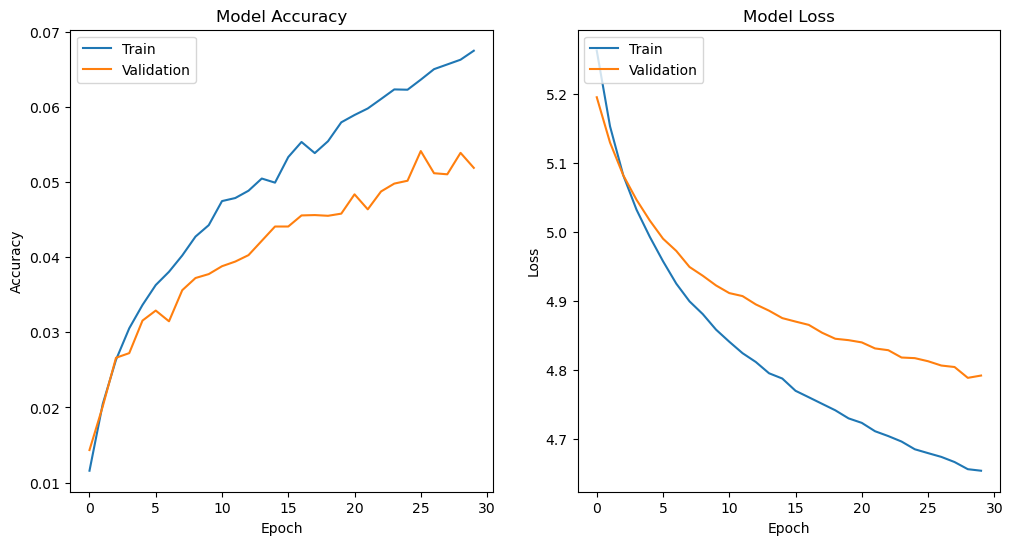

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [5]:
new_images_datagen = ImageDataGenerator(rescale=1./255)

new_images_generator = new_images_datagen.flow_from_directory(
    'C://Users//jkim436//Downloads//gallery-dl//pinterest//districtofchic',
    target_size=(64, 64),
    batch_size=1,  
    class_mode=None,  
    shuffle=False  
)

Found 444 images belonging to 1 classes.


In [7]:
import numpy as np

In [8]:
predictions = model.predict(new_images_generator)
predicted_classes = np.argmax(predictions, axis=1)


444/444 ━━━━━━━━━━━━━━━━━━━━ 43s 97ms/step


In [10]:
predicted_classes = np.argmax(predictions, axis=1)


In [11]:
num_images = len(new_images_generator.filenames)
num_classes = 197  
user_item_matrix = np.zeros((num_images, num_classes))

for i, class_index in enumerate(predicted_classes):
    user_item_matrix[i, class_index] = 1

import pandas as pd
class_labels = [f'Class_{i}' for i in range(num_classes)]  # Modify as per actual class names if available
user_item_df = pd.DataFrame(user_item_matrix, columns=class_labels, index=new_images_generator.filenames)

print(user_item_df.head())


                                              Class_0  Class_1  Class_2  \
Style Inspo\pinterest_161214861651933404.png      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115460.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115470.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115471.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652128869.jpg      0.0      0.0      0.0   

                                              Class_3  Class_4  Class_5  \
Style Inspo\pinterest_161214861651933404.png      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115460.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115470.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652115471.jpg      0.0      0.0      0.0   
Style Inspo\pinterest_161214861652128869.jpg      0.0      0.0      0.0   

                                              Class_6  Class_7  Class_8  \
Style Inspo\pinterest_1

In [12]:
user_item_df.to_csv('C://Users//jkim436//Downloads//user_item_matrix1.csv')


In [13]:
model.save('C://Users//jkim436//Downloads//saved_model.keras')

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('C://Users//jkim436//Downloads//saved_model.keras')  # Adjust the path as needed

# Load the image
img_path = 'C:\\Users\\jkim436\\Downloads\\981ea5c9-eb30-4cab-ac99-03b2f82d6383.webp'  # Adjust the path and filename as needed
img = load_img(img_path, target_size=(64, 64))  # Resize to the input size of the model
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch
img_array /= 255.0  # Rescale the image similarly as the training data

# Predict the class
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [15]:
user_item_matrix = pd.read_csv('C://Users//jkim436//Downloads//user_item_matrix1.csv', index_col=0)

class_names = user_item_matrix.columns.tolist()

predicted_class_name = class_names[predicted_class_index]

predicted_row = user_item_matrix.loc[:, predicted_class_name]

top_categories = predicted_row.sort_values(ascending=False).head(3).index.tolist()

print("Recommended categories based on the detected item category:")
print(top_categories)


Recommended categories based on the detected item category:
['Style Inspo\\pinterest_161214861651933404.png', 'Style Inspo\\pinterest_161214861653195948.jpg', 'Style Inspo\\pinterest_161214861653228143.jpg']


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cosine, jaccard

def safe_cosine(x, y):
    # Adding a tiny epsilon to the denominator to avoid division by zero
    try:
        if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
            return 0
        return 1 - cosine(x, y)
    except Exception as e:
        print(f"Error calculating cosine: {e}")
        return 0

def safe_jaccard(x, y):
    try:
        return 1 - jaccard(x, y)
    except:
        return 0

user_item_matrix = pd.read_csv('C://Users//jkim436//Downloads//user_item_matrix1.csv', index_col=0)

model = load_model('C://Users//jkim436//Downloads//saved_model.keras')

img_path = 'C://Users//jkim436//Downloads//9118001_1563416.webp'
img = load_img(img_path, target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = user_item_matrix.columns[predicted_class_index]

cosine_similarities = user_item_matrix.apply(lambda x: safe_cosine(x, user_item_matrix[predicted_class_name]), axis=0)
top_cosine_categories = cosine_similarities.sort_values(ascending=False).head(5)

jaccard_similarities = user_item_matrix.apply(lambda x: safe_jaccard(x, user_item_matrix[predicted_class_name]), axis=0)
top_jaccard_categories = jaccard_similarities.sort_values(ascending=False).head(5)

print("Top categories based on cosine similarity:", top_cosine_categories.index.tolist())
print("Top categories based on Jaccard similarity:", top_jaccard_categories.index.tolist())

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top categories based on cosine similarity: ['Class_195', 'Class_0', 'Class_135', 'Class_125', 'Class_126']
Top categories based on Jaccard similarity: ['Class_195', 'Class_0', 'Class_135', 'Class_125', 'Class_126']


In [20]:
filtered_matrix = user_item_matrix[top_cosine_categories.index.tolist()]

composite_scores = filtered_matrix.sum(axis=1)

top_rows = composite_scores.sort_values(ascending=False).head(3)

print("Top 3 similar rows based on the selected top categories:")
for index, score in top_rows.items():
    print(f"Row index: {index}")

Top 3 similar rows based on the selected top categories:
Row index: Style Inspo\pinterest_161214861653052041.png
Row index: Style Inspo\pinterest_161214861652493157.jpg
Row index: Style Inspo\pinterest_161214861653826557.png


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine, jaccard

def safe_cosine(x, y):
    try:
        if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
            return 0
        return 1 - cosine(x, y)
    except Exception as e:
        print(f"Error calculating cosine: {e}")
        return 0

def safe_jaccard(x, y):
    try:
        x_bin = np.round(x).astype(int)
        y_bin = np.round(y).astype(int)
        return 1 - jaccard(x_bin, y_bin)
    except Exception as e:
        print(f"Error calculating Jaccard: {e}")
        return 0

class_indices = train_generator.class_indices
index_class_map = {v: k for k, v in class_indices.items()}

user_item_matrix = pd.read_csv('C://Users//jkim436//Downloads//user_item_matrix.csv', index_col=0)
user_item_matrix.columns = [index_class_map[int(idx.split('_')[1])] for idx in user_item_matrix.columns]

model = load_model('C://Users//jkim436//Downloads//saved_model.keras')

img_path = 'C://Users//jkim436//Downloads//9118001_1563416.webp'
img = load_img(img_path, target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = index_class_map[predicted_class_index]

if predicted_class_name in user_item_matrix.columns:
    similarity_columns = [col for col in user_item_matrix.columns if col != predicted_class_name]
    
    cosine_similarities = user_item_matrix[similarity_columns].apply(lambda x: safe_cosine(x, user_item_matrix[predicted_class_name]), axis=0)
    top_cosine_categories = cosine_similarities.sort_values(ascending=False).head(5)
    print("Top categories based on cosine similarity:", top_cosine_categories.index.tolist())

    jaccard_similarities = user_item_matrix[similarity_columns].apply(lambda x: safe_jaccard(x, user_item_matrix[predicted_class_name]), axis=0)
    top_jaccard_categories = jaccard_similarities.sort_values(ascending=False).head(5)
    print("Top categories based on Jaccard similarity:", top_jaccard_categories.index.tolist())
else:
    print(f"The predicted class '{predicted_class_name}' is not found in the user-item matrix.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Top categories based on cosine similarity: ['ANKLE+BOOTS', 'PALAZZO+TROUSERS', 'PEARL+NECKLACE', 'PLATFORM+SNEAKERS', 'PLATFORM+WEDGE+SANDALS']
Top categories based on Jaccard similarity: ['ANKLE+BOOTS', 'PALAZZO+TROUSERS', 'PEARL+NECKLACE', 'PLATFORM+SNEAKERS', 'PLATFORM+WEDGE+SANDALS']


In [25]:
predicted_class_name

'WIDE+LEG+HIGH-RISE+JEANS'

In [22]:
base_dir = 'C://Users//jkim436//Downloads//compressed_images'

class_indices = train_generator.class_indices
index_class_map = {v: k for k, v in class_indices.items()}

predicted_classes = [0, 5, 10]  
for idx in predicted_classes:
    class_name = index_class_map[idx]
    category_dir = os.path.join(base_dir, class_name)  
    example_image_name = os.listdir(category_dir)[0]  
    example_image_path = os.path.join(category_dir, example_image_name)
    print(f"Example image for category '{class_name}': {example_image_path}")

Example image for category 'ANKLE+BOOTS': C://Users//jkim436//Downloads//compressed_images\ANKLE+BOOTS\pinterest_1040120476438250230.jpg
Example image for category 'BERMUDA+SHORTS': C://Users//jkim436//Downloads//compressed_images\BERMUDA+SHORTS\pinterest_1003247254484547555.jpg
Example image for category 'BLOUSE+WITH+SHORT+SLEEVES': C://Users//jkim436//Downloads//compressed_images\BLOUSE+WITH+SHORT+SLEEVES\pinterest_1008313804046368257.jpg


In [26]:
img_path = 'C://Users//jkim436//Downloads//images.jfif'
img = load_img(img_path, target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = user_item_matrix.columns[predicted_class_index]

cosine_similarities = user_item_matrix.apply(lambda x: safe_cosine(x, user_item_matrix[predicted_class_name]), axis=0)
top_cosine_categories = cosine_similarities.sort_values(ascending=False).head(5)

jaccard_similarities = user_item_matrix.apply(lambda x: safe_jaccard(x, user_item_matrix[predicted_class_name]), axis=0)
top_jaccard_categories = jaccard_similarities.sort_values(ascending=False).head(5)

print("Top categories based on cosine similarity:", top_cosine_categories.index.tolist())
print("Top categories based on Jaccard similarity:", top_jaccard_categories.index.tolist())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Top categories based on cosine similarity: ['ANKLE+BOOTS', 'PATCHWORK+KNIT+CARDIGAN', 'PLATFORM+SNEAKERS', 'PLATFORM+WEDGE+SANDALS', 'PLEATED+SKIRT']
Top categories based on Jaccard similarity: ['ANKLE+BOOTS', 'LINEN+SHIRT+WITH+POCKET', 'PEARL+NECKLACE', 'PAISLEY+PRINT+SHIRT', 'OXFORD+SHIRT']


In [27]:
filtered_matrix = user_item_matrix[top_cosine_categories.index.tolist()]

composite_scores = filtered_matrix.sum(axis=1)

top_rows = composite_scores.sort_values(ascending=False).head(3)

print("Top 3 similar rows based on the selected top categories:")
for index, score in top_rows.items():
    print(f"Row index: {index}")

Top 3 similar rows based on the selected top categories:
Row index: Style Inspo\pinterest_161214861652308701.jpg
Row index: Style Inspo\pinterest_161214861652573748.png
Row index: Style Inspo\pinterest_161214861653657899.jpg


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine, jaccard

def safe_cosine(x, y):
    try:
        if np.linalg.norm(x) == 0 or np.linalg.norm(y) == 0:
            return 0
        return 1 - cosine(x, y)
    except Exception as e:
        print(f"Error calculating cosine: {e}")
        return 0

def safe_jaccard(x, y):
    try:
        x_bin = np.round(x).astype(int)
        y_bin = np.round(y).astype(int)
        return 1 - jaccard(x_bin, y_bin)
    except Exception as e:
        print(f"Error calculating Jaccard: {e}")
        return 0

class_indices = train_generator.class_indices
index_class_map = {v: k for k, v in class_indices.items()}

user_item_matrix = pd.read_csv('C://Users//jkim436//Downloads//user_item_matrix1.csv', index_col=0)
user_item_matrix.columns = [index_class_map[int(idx.split('_')[1])] for idx in user_item_matrix.columns]

model = load_model('C://Users//jkim436//Downloads//saved_model.keras')

img_path = 'C://Users//jkim436//Downloads//images.jfif'
img = load_img(img_path, target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = index_class_map[predicted_class_index]

if predicted_class_name in user_item_matrix.columns:
    similarity_columns = [col for col in user_item_matrix.columns if col != predicted_class_name]
    
    cosine_similarities = user_item_matrix[similarity_columns].apply(lambda x: safe_cosine(x, user_item_matrix[predicted_class_name]), axis=0)
    top_cosine_categories = cosine_similarities.sort_values(ascending=False).head(5)
    print("Top categories based on cosine similarity:", top_cosine_categories.index.tolist())

    jaccard_similarities = user_item_matrix[similarity_columns].apply(lambda x: safe_jaccard(x, user_item_matrix[predicted_class_name]), axis=0)
    top_jaccard_categories = jaccard_similarities.sort_values(ascending=False).head(5)
    print("Top categories based on Jaccard similarity:", top_jaccard_categories.index.tolist())
else:
    print(f"The predicted class '{predicted_class_name}' is not found in the user-item matrix.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top categories based on cosine similarity: ['ANKLE+BOOTS', 'PALAZZO+TROUSERS', 'PEARL+NECKLACE', 'PLATFORM+SNEAKERS', 'PLATFORM+WEDGE+SANDALS']
Top categories based on Jaccard similarity: ['ANKLE+BOOTS', 'SHEER+BLOUSE', 'LINEN+SHIRT', 'SATIN+SHIRT', 'SATIN+TROUSERS']


In [29]:
predicted_class_name

'QUARTER+ZIP'